<a href="https://colab.research.google.com/github/kyathi-sravanam/customer_sentiment_analysis/blob/main/Customer_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("twitter_training.csv", header=None, names=['ID', 'Entity', 'Sentiment', 'Tweet'])
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

df = df.dropna(subset=['Tweet'])

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['Clean_Tweet'] = df['Tweet'].apply(preprocess_text)

label_encoder = LabelEncoder()
df['Sentiment_Label'] = label_encoder.fit_transform(df['Sentiment'])

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Clean_Tweet'])
y = df['Sentiment_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

sample_df = df.sample(5, random_state=1)
sample_vec = vectorizer.transform(sample_df['Clean_Tweet'])
sample_preds = label_encoder.inverse_transform(model.predict(sample_vec))

print("\nSample Predictions:")
for i, row in sample_df.iterrows():
    print(f"Tweet: {row['Tweet']}")
    print(f"Predicted Sentiment: {sample_preds[list(sample_df.index).index(i)]}")
    print("---")


Saving twitter_training.csv to twitter_training.csv
Accuracy: 0.6806756756756757

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.69      0.50      0.58      2696
    Negative       0.71      0.78      0.74      4380
     Neutral       0.64      0.63      0.64      3605
    Positive       0.68      0.74      0.71      4119

    accuracy                           0.68     14800
   macro avg       0.68      0.66      0.67     14800
weighted avg       0.68      0.68      0.68     14800


Sample Predictions:
Tweet: Are we just going to pretend to be @ Ubisoft and not forget what they're doing... You're driving Ubisoft, we're waiting!!.
Predicted Sentiment: Negative
---
Tweet: The problem is even more than racism, it's a direct abuse of power to find any good reason to use force or hurt someone, it's like they're really having fun, how many of these cunning gun-wielding people have actually seen a real fight?
Predicted Sentiment: Negative
-

Accuracy: 0.6806756756756757

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.69      0.50      0.58      2696
    Negative       0.71      0.78      0.74      4380
     Neutral       0.64      0.63      0.64      3605
    Positive       0.68      0.74      0.71      4119

    accuracy                           0.68     14800
   macro avg       0.68      0.66      0.67     14800
weighted avg       0.68      0.68      0.68     14800


Sample Predictions:
Tweet: Are we just going to pretend to be @ Ubisoft and not forget what they're doing... You're driving Ubisoft, we're waiting!!.
Predicted Sentiment: Negative
---
Tweet: The problem is even more than racism, it's a direct abuse of power to find any good reason to use force or hurt someone, it's like they're really having fun, how many of these cunning gun-wielding people have actually seen a real fight?
Predicted Sentiment: Negative
---
Tweet: Hey @EAMaddenNFL but when else is the upda

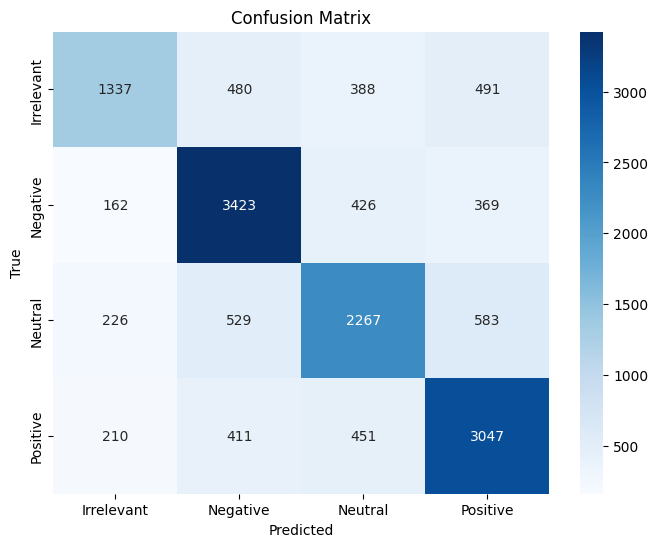

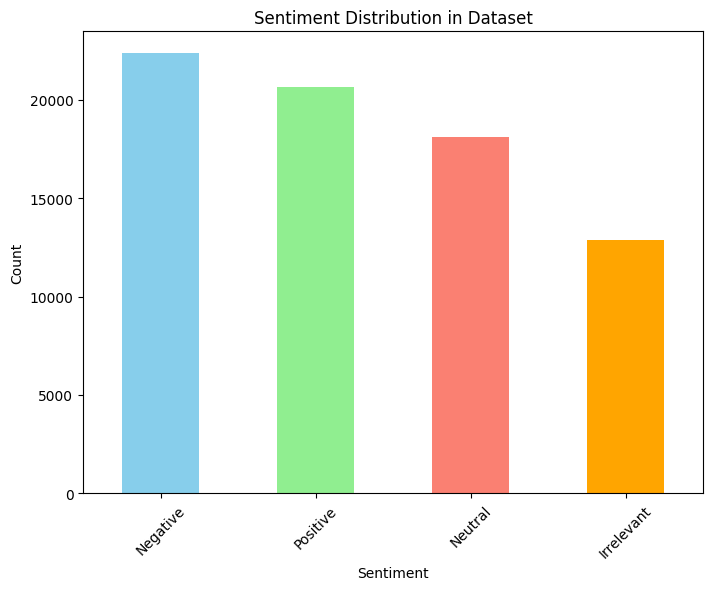

In [3]:
#logestic reg
import pandas as pd

import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/twitter_training.csv', header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']

df = df.dropna(subset=['Tweet'])
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['Clean_Tweet'] = df['Tweet'].apply(preprocess_text)

label_encoder = LabelEncoder()
df['Sentiment_Label'] = label_encoder.fit_transform(df['Sentiment'])

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Clean_Tweet'])
y = df['Sentiment_Label']
33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

sample_df = df.sample(5, random_state=1)
sample_vec = vectorizer.transform(sample_df['Clean_Tweet'])
sample_preds = label_encoder.inverse_transform(model.predict(sample_vec))

print("\nSample Predictions:")
for i, row in sample_df.iterrows():
    print(f"Tweet: {row['Tweet']}")
    print(f"Predicted Sentiment: {sample_preds[list(sample_df.index).index(i)]}")
    print("---")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(8, 6))
df['Sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Sentiment Distribution in Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


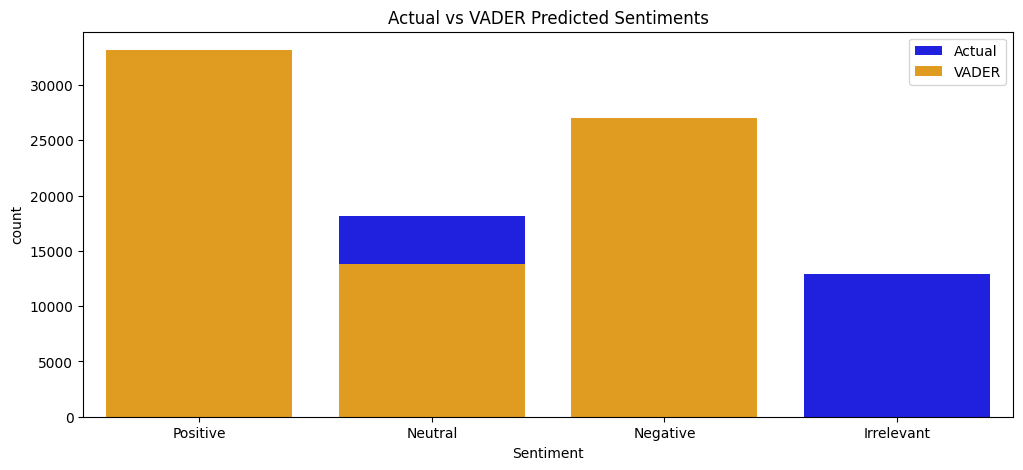

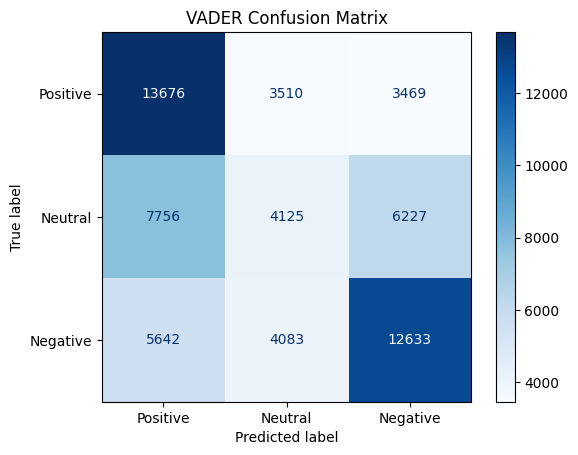

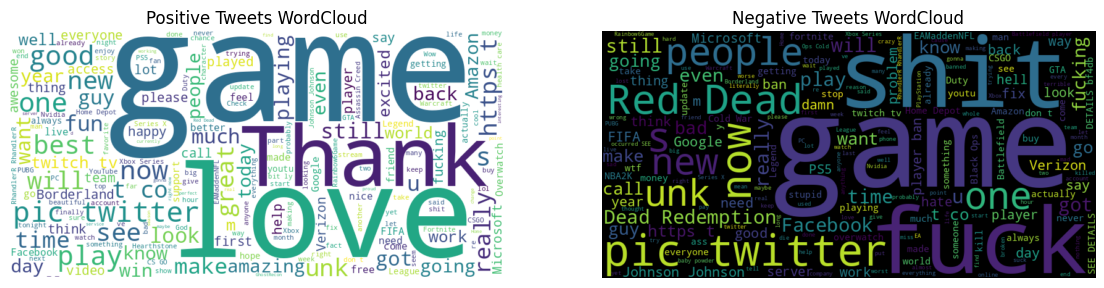

In [4]:
#RULE BASED
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

nltk.download('vader_lexicon')

df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df.dropna(subset=['Tweet'], inplace=True)

sid = SentimentIntensityAnalyzer()
df['vader_score'] = df['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['vader_sentiment'] = df['vader_score'].apply(lambda x: 'Positive' if x >= 0.05 else 'Negative' if x <= -0.05 else 'Neutral')

plt.figure(figsize=(12, 5))
sns.countplot(x='Sentiment', data=df, label="Actual", color='blue')
sns.countplot(x='vader_sentiment', data=df, label="VADER", color='orange')
plt.legend()
plt.title("Actual vs VADER Predicted Sentiments")
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df['Sentiment'], df['vader_sentiment'], labels=['Positive', 'Neutral', 'Negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative'])
disp.plot(cmap='Blues')
plt.title("VADER Confusion Matrix")
plt.show()

pos_text = ' '.join(df[df['vader_sentiment'] == 'Positive']['Tweet'])
neg_text = ' '.join(df[df['vader_sentiment'] == 'Negative']['Tweet'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(neg_text)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Tweets WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Tweets WordCloud")
plt.show()


              precision    recall  f1-score   support

    Negative       0.76      0.84      0.80      4427
     Neutral       0.77      0.68      0.72      3678
    Positive       0.77      0.76      0.77      4120

    accuracy                           0.77     12225
   macro avg       0.77      0.76      0.76     12225
weighted avg       0.77      0.77      0.76     12225



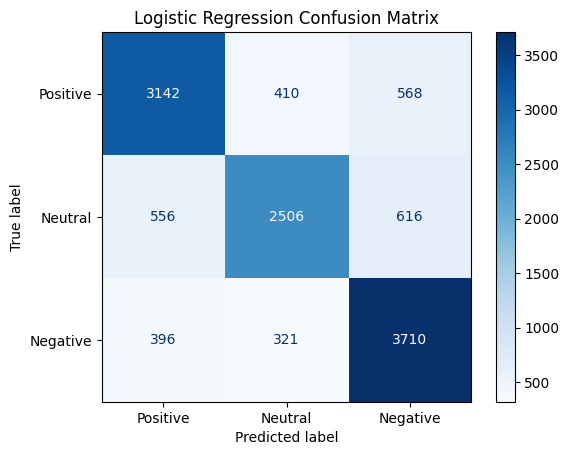

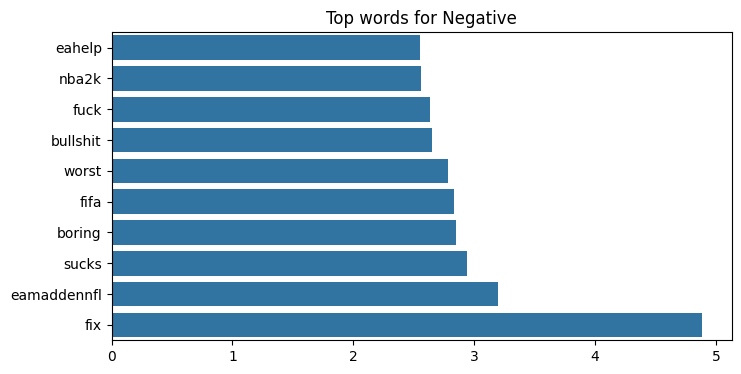

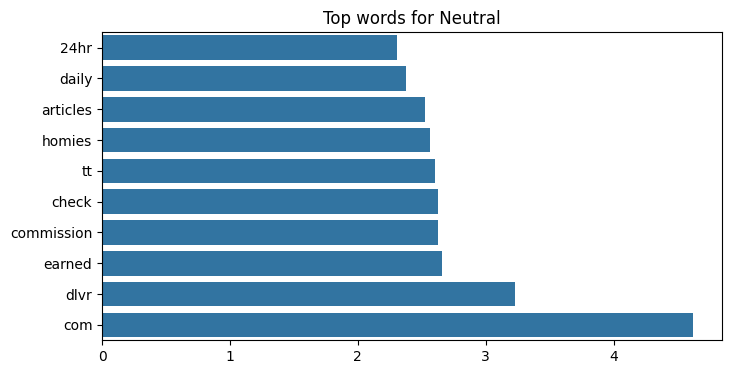

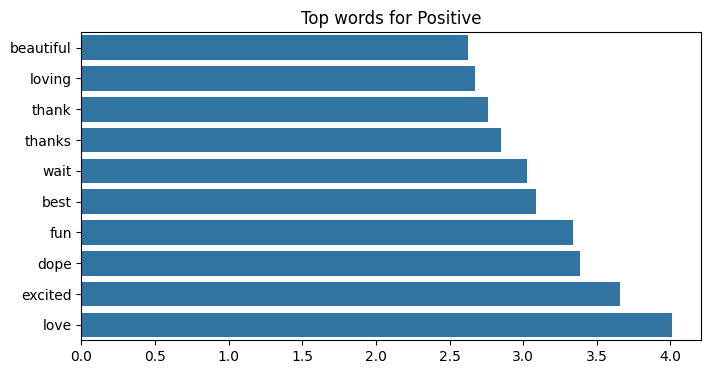

In [5]:
#ML BASED(LOGISTIC REGRESSION + TF-IDF)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df_ml = df[df['Sentiment'].isin(['Positive', 'Neutral', 'Negative'])]

X = df_ml['Tweet']
y = df_ml['Sentiment']

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Neutral', 'Negative'])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Neutral', 'Negative']).plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_
labels = model.classes_

top_n = 10
for i, label in enumerate(labels):
    top_words_idx = coefs[i].argsort()[-top_n:]
    top_words = [feature_names[j] for j in top_words_idx]
    weights = coefs[i][top_words_idx]

    plt.figure(figsize=(8, 4))
    sns.barplot(x=weights, y=top_words)
    plt.title(f"Top words for {label}")
    plt.show()

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


374/374 ━━━━━━━━━━━━━━━━━━━━ 89s 229ms/step - accuracy: 0.4440 - loss: 1.2345 - val_accuracy: 0.6771 - val_loss: 0.8202
Epoch 2/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 128s 191ms/step - accuracy: 0.7407 - loss: 0.6861 - val_accuracy: 0.7364 - val_loss: 0.6961
Epoch 3/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 79s 183ms/step - accuracy: 0.8114 - loss: 0.5187 - val_accuracy: 0.7660 - val_loss: 0.6321
Epoch 4/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 67s 180ms/step - accuracy: 0.8484 - loss: 0.4176 - val_accuracy: 0.7807 - val_loss: 0.6094
Epoch 5/5
374/374 ━━━━━━━━━━━━━━━━━━━━ 82s 179ms/step - accuracy: 0.8649 - loss: 0.3614 - val_accuracy: 0.7869 - val_loss: 0.6060


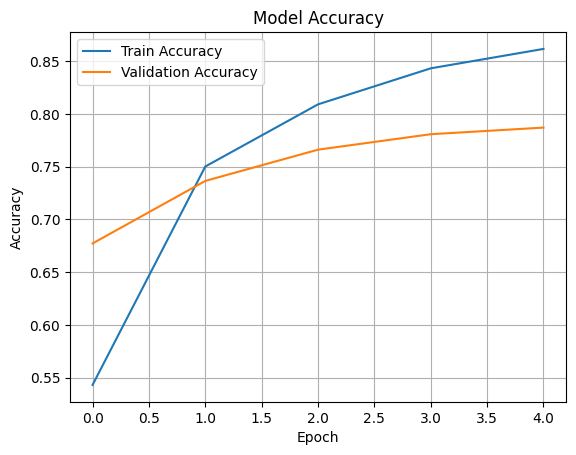

467/467 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step


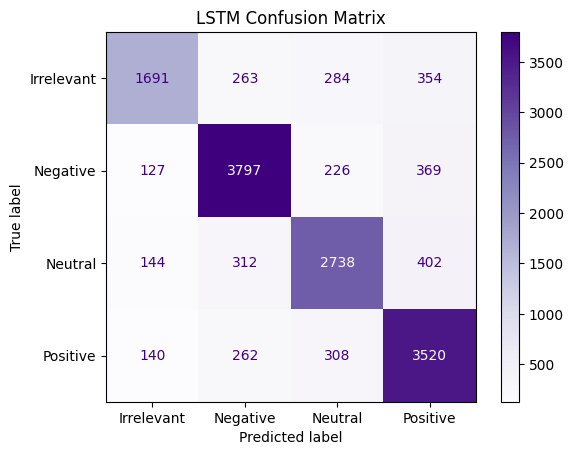

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("twitter_training.csv", header=None)

X = df[3].astype(str).values
y = df[2].astype(str).values

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)
encoder = LabelEncoder()
y_enc = encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_enc, test_size=0.2, random_state=42)

model = Sequential([
    Embedding(10000, 64, input_length=100),
    LSTM(64),
    Dropout(0.5),
    Dense(len(np.unique(y_enc)), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=128)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(cmap='Purples')
plt.title("LSTM Confusion Matrix")
plt.grid(False)
plt.show()

2334/2334 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step


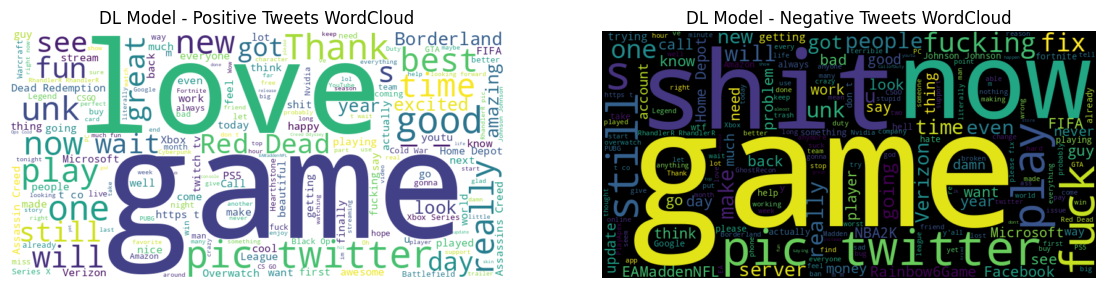

In [7]:
from wordcloud import WordCloud

predicted_labels = encoder.inverse_transform(y_pred)
df_dl = pd.DataFrame({'Tweet': X, 'Predicted': encoder.inverse_transform(model.predict(X_pad).argmax(axis=1))})

dl_pos_text = ' '.join(df_dl[df_dl['Predicted'] == 'Positive']['Tweet'])
dl_neg_text = ' '.join(df_dl[df_dl['Predicted'] == 'Negative']['Tweet'])

wordcloud_dl_pos = WordCloud(width=800, height=400, background_color='white').generate(dl_pos_text)
wordcloud_dl_neg = WordCloud(width=800, height=400, background_color='black').generate(dl_neg_text)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_dl_pos, interpolation='bilinear')
plt.axis('off')
plt.title("DL Model - Positive Tweets WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_dl_neg, interpolation='bilinear')
plt.axis('off')
plt.title("DL Model - Negative Tweets WordCloud")
plt.show()